In [1]:
import os
import sys
import warnings

sys.path.append("../src/")
sys.path.append("../model/")
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from io_utils import load_dataset, save_model, model_log, load_model
from metric import load_exp_logs, analyse_kaggle

### Kaggle

#### Supervised

In [3]:
exp = [
    "target",
    "exp_subsup_sparse",
    "exp_latent_multiDA_sup",
    "exp_dctn_sup",
    "exp_sup_sparse",
    "exp_dan_sup",
    "exp_dann_sup",
    "exp_mcd_sup",
    "exp_finetune",
]

sticks = [
    "NN Baseline",
    "NN HSAV",
    "MultiDA",
    "DCTN",
    "NN SCDA",
    "DAN",
    "DANN",
    "MCD",
    "FineTune",
]


# Weight
tab, raw_res = analyse_kaggle("nn", "pr_auc", exp, sticks, task="kaggle", period=[0, 1, 2], 
               source_version="uni", relative=True, variance=False, mode="mean")
# print(tab.to_latex(index=False, column_format='lcccc'))
tab

,Method,D-1 to M,D-2 to M,D-3 to M,AVG
0,NN Baseline,-0.00,-0.00,-0.00,-0.00
1,NN HSAV,12.61,5.64,4.87,7.70
2,MultiDA,-5.71,-2.87,-0.25,-2.94
3,DCTN,-13.58,-11.77,-5.00,-10.12
4,NN SCDA,1.30,2.98,3.72,2.66
5,DAN,15.40,-0.57,1.53,5.45
6,DANN,5.77,-0.87,-2.40,0.83
7,MCD,8.96,-2.48,-2.89,1.20
8,FineTune,4.23,2.12,4.95,3.76


In [4]:
lgb_exp = [
    "exp_subsup_sparse",
    "exp_sup_sparse",
    "target",
]

lgb_sticks = [
    "LGB HSAV",
    "LGB SCDA",
    "LGB Baseline",
]

tab, lgb_raw_res = analyse_kaggle("lgb", "pr_auc", lgb_exp, lgb_sticks, task="kaggle", period=[0, 1, 2], 
               source_version="uni", relative=True, variance=False, mode="mean")

# print(tab.to_latex(index=False, column_format='lcccc'))
tab

,Method,D-1 to M,D-2 to M,D-3 to M,AVG
0,LGB HSAV,29.52,8.49,14.51,17.51
1,LGB SCDA,27.85,7.18,13.66,16.23
2,LGB Baseline,26.43,4.36,7.60,12.80


#### Unsupervised

In [5]:
exp = [
    "target",
    "exp_subunsup_sparse",
    "exp_latent_multiDA",
    "exp_dctn",
    "exp_unsup_sparse",
    "exp_dan",
    "exp_dann",
    "exp_mcd",
]

sticks = [
    "NN Baseline",
    "NN HSAV",
    "MultiDA",
    "DCTN",
    "NN SCDA",
    "DAN",
    "DANN",
    "MCD",
]

tab, raw_res = analyse_kaggle("nn", "pr_auc", exp, sticks, task="kaggle", period=[0, 1, 2], 
               source_version="uni", relative=True, variance=False, mode="mean")
# print(tab.to_latex(index=False, column_format='lcccc'))
tab

,Method,D-1 to M,D-2 to M,D-3 to M,AVG
0,NN Baseline,-0.00,-0.00,-0.00,-0.00
1,NN HSAV,5.26,3.24,5.51,4.67
2,MultiDA,4.59,-7.29,-4.64,-2.45
3,DCTN,-16.87,-13.40,-8.59,-12.95
4,NN SCDA,3.23,2.88,5.41,3.84
5,DAN,12.31,-3.20,1.41,3.51
6,DANN,3.47,-2.90,-4.21,-1.21
7,MCD,-11.47,-6.29,-6.81,-8.19


In [6]:
lgb_exp = [
    "exp_subunsup_sparse",
    "exp_unsup_sparse",
    "target",
]

lgb_sticks = [
    "LGB HSAV",
    "LGB SCDA",
    "LGB Baseline",
]

tab, lgb_raw_res = analyse_kaggle("lgb", "pr_auc", lgb_exp, lgb_sticks, task="kaggle", period=[0, 1, 2], 
               source_version="uni", relative=True, variance=False, mode="mean")
# print(tab.to_latex(index=False, column_format='lcccc'))
tab

,Method,D-1 to M,D-2 to M,D-3 to M,AVG
0,LGB HSAV,32.87,7.41,14.43,18.24
1,LGB SCDA,32.68,7.14,14.31,18.04
2,LGB Baseline,26.43,4.36,7.60,12.80


In [7]:
boxprops = dict(linewidth=3)
flierprops = dict(marker='o', markerfacecolor='green', markersize=7,
                  markeredgecolor='none')
medianprops = dict(linewidth=3)
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

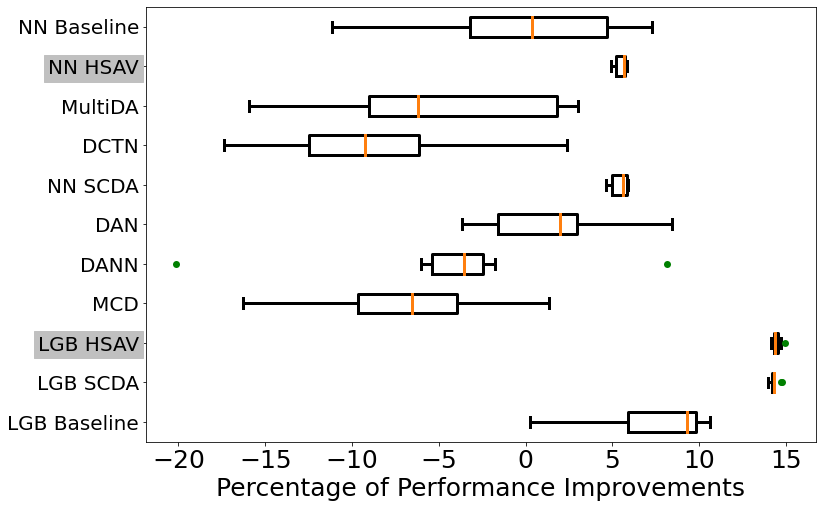

In [9]:
i = 2

plot_res = (raw_res[i] + lgb_raw_res[i])[::-1]
plot_stick = (sticks + lgb_sticks)[::-1]

plt.figure(figsize=(12, 8))
plt.boxplot(plot_res, vert=False, boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

plt.yticks(np.arange(len(plot_res))+1, plot_stick, size=20)
_, ticks = plt.yticks()
for t in ticks:
    if "HSAV" in t.get_text():
        t.set_backgroundcolor("silver")

plt.xlabel("Percentage of Performance Improvements", size=25)
plt.xticks(size=25)

plt.savefig("./pdf_images/kaggle_unsup_{}.pdf".format(i), bbox_inches='tight')
plt.show()